In [2]:
import pandas as pd

# Baca sheet yang tersedia dulu
xls = pd.ExcelFile('WHO TB dataset_2024-03-21.xlsx')
xls.sheet_names  # lihat semua nama sheet

['LTBI_estimates_2024-03-21',
 'TB_budget_2024-03-21',
 'TB_burden_age_sex_2024-03-21',
 'TB_burden_countries_2024-03-21',
 'TB_community_engagement_2024-03',
 'TB_contact_tpt_2024-03-21',
 'TB_data_dictionary_2024-03-21',
 'TB_expenditure_utilisation_2024',
 'TB_hiv_nonroutine_surveillance_',
 'TB_laboratories_2024-03-21',
 'TB_outcomes_2024-03-21',
 'TB_outcomes_age_sex_2024-03-21',
 'TB_policies_services_2024-03-21',
 'TB_unhlm_2024-03-21',
 'TB_ppm_2024-03-21',
 'Metadata_Country_API_NY.GDP.PCA']

In [4]:
import pandas as pd

# === 1. Baca File Excel ===
xls = pd.ExcelFile('WHO TB dataset_2024-03-21.xlsx')
sheet_names = xls.sheet_names

# === 2. Skip Sheet yang Tidak Perlu ===
skip_sheets = ['TB_data_dictionary_2024-03-21', 'Metadata_Country_API_NY.GDP.PCA']
usable_sheets = [s for s in sheet_names if s not in skip_sheets]

# === 3. Gabungkan Semua Sheet ===
all_data = []
for sheet in usable_sheets:
    try:
        df = xls.parse(sheet)
        df['SheetName'] = sheet  # Tandai asal sheet

        # Normalisasi nama kolom
        df.columns = [str(c).strip() for c in df.columns]

        # Ambil hanya kolom penting jika ada
        selected_cols = ['country', 'year', 'indicator', 'value', 'SheetName']
        available_cols = [col for col in selected_cols if col in df.columns]
        df_cleaned = df[available_cols].copy()

        all_data.append(df_cleaned)

    except Exception as e:
        print(f"❌ Gagal proses sheet '{sheet}': {e}")

# === 4. Gabungkan Semua Menjadi Satu DataFrame ===
df_combined = pd.concat(all_data, ignore_index=True)

# === 5. Tampilkan 5 Baris Pertama untuk Verifikasi ===
df_combined.head()

,country,year,SheetName
0,Afghanistan,2022,LTBI_estimates_2024-03-21
1,Albania,2022,LTBI_estimates_2024-03-21
2,Algeria,2022,LTBI_estimates_2024-03-21
3,Angola,2022,LTBI_estimates_2024-03-21
4,Argentina,2022,LTBI_estimates_2024-03-21


In [8]:
df_combined.columns.unique()

Index(['country', 'year', 'SheetName'], dtype='object')

In [9]:
# Muat ulang sheet TB_burden_countries_2024-03-21 saja
df_burden = xls.parse('TB_burden_countries_2024-03-21')

# Cek kolom-kolom yang tersedia
df_burden.columns = [c.strip() for c in df_burden.columns]
df_burden.columns.unique()

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'e_pop_num', 'e_inc_100k', 'e_inc_100k_lo', 'e_inc_100k_hi',
       'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct',
       'e_tbhiv_prct_lo', 'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k',
       'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
       'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k',
       'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
       'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo',
       'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo',
       'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo',
       'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo',
       'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr',
       'cfr_lo', 'cfr_hi', 'cfr_pct', 'cfr_pct_lo', 'cfr_pct_hi',
       'c_newinc_100k', 'c_cdr', 'c_cdr_lo', 'c_cdr_hi'],
      dtype='object')

In [11]:
# Lihat semua nama kolom dari sheet TB_burden_countries_2024-03-21
df_burden = xls.parse('TB_burden_countries_2024-03-21')
df_burden.columns = [c.strip() for c in df_burden.columns]
df_burden.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'e_pop_num', 'e_inc_100k', 'e_inc_100k_lo', 'e_inc_100k_hi',
       'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct',
       'e_tbhiv_prct_lo', 'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k',
       'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
       'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k',
       'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
       'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo',
       'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo',
       'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo',
       'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo',
       'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr',
       'cfr_lo', 'cfr_hi', 'cfr_pct', 'cfr_pct_lo', 'cfr_pct_hi',
       'c_newinc_100k', 'c_cdr', 'c_cdr_lo', 'c_cdr_hi'],
      dtype='object')

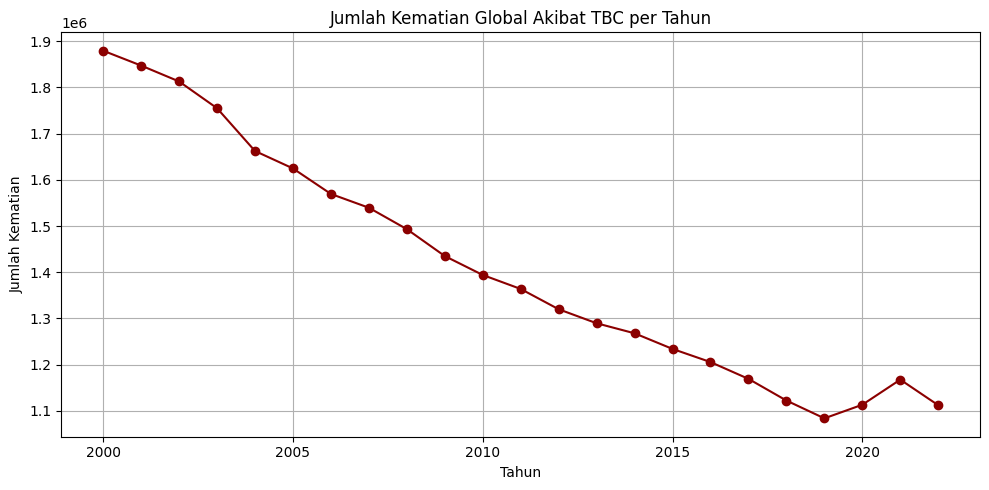

In [13]:
import matplotlib.pyplot as plt

# Filter hanya yang punya data kematian
df_death_global = df_burden[df_burden['e_mort_exc_tbhiv_num'].notna()]

# Agregasi global per tahun
df_death_global_agg = df_death_global.groupby('year')['e_mort_exc_tbhiv_num'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(df_death_global_agg['year'], df_death_global_agg['e_mort_exc_tbhiv_num'],
         marker='o', color='darkred')

plt.title('Jumlah Kematian Global Akibat TBC per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.grid(True)
plt.tight_layout()
plt.show()

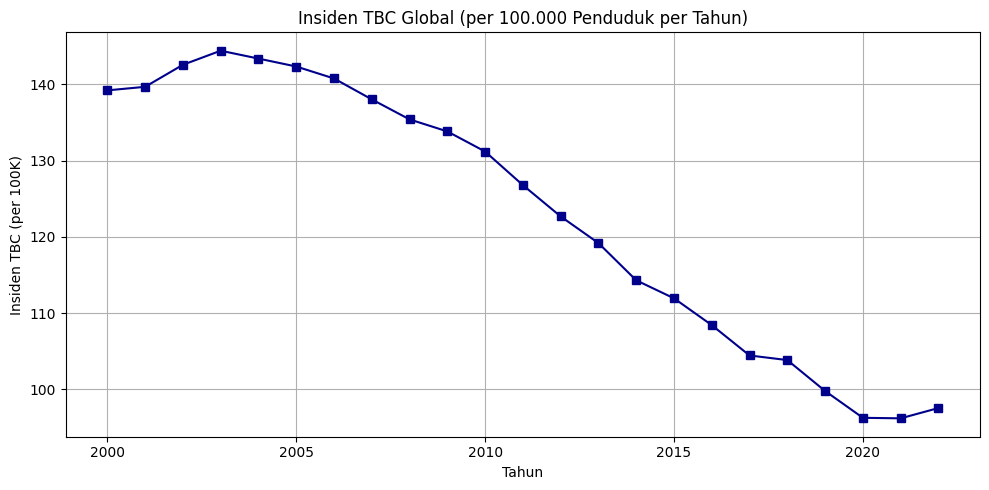

In [19]:
df_prev_global = df_burden[df_burden['e_inc_100k'].notna()]
df_prev_global_agg = df_prev_global.groupby('year')['e_inc_100k'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_prev_global_agg['year'], df_prev_global_agg['e_inc_100k'],
         marker='s', color='darkblue')
plt.title('Insiden TBC Global (per 100.000 Penduduk per Tahun)')
plt.xlabel('Tahun')
plt.ylabel('Insiden TBC (per 100K)')
plt.grid(True)
plt.tight_layout()
plt.show()


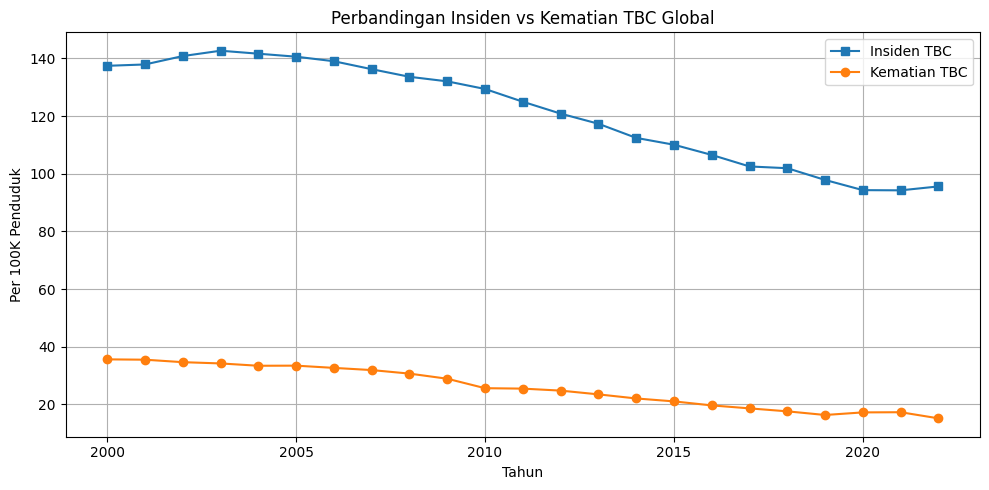

In [20]:
# Perbandingan 2 Garis: Incidence vs Mortality

df_global = df_burden[['year', 'e_inc_100k', 'e_mort_100k']].dropna()

df_global_agg = df_global.groupby('year').mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_global_agg['year'], df_global_agg['e_inc_100k'], label='Insiden TBC', marker='s')
plt.plot(df_global_agg['year'], df_global_agg['e_mort_100k'], label='Kematian TBC', marker='o')
plt.title('Perbandingan Insiden vs Kematian TBC Global')
plt.xlabel('Tahun')
plt.ylabel('Per 100K Penduduk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

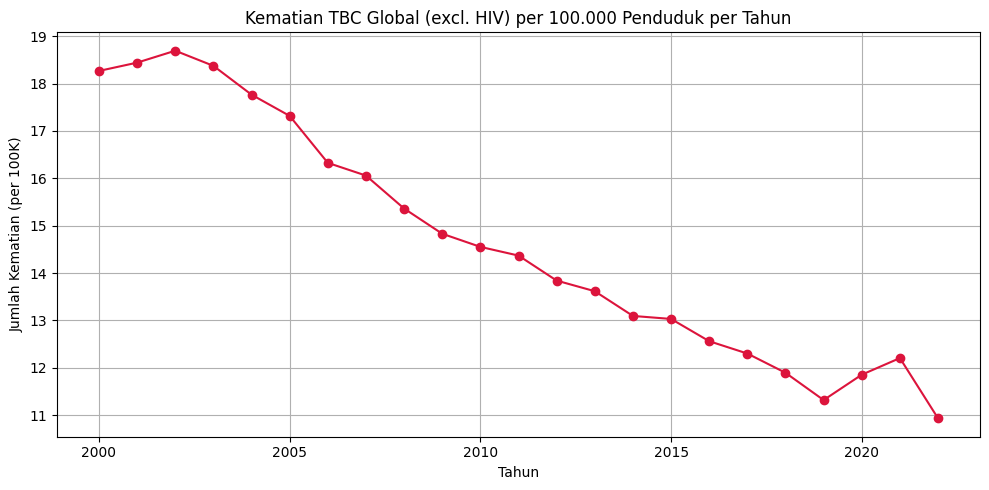

In [21]:
# Tingkat Kematian Akibat TBC per 100.000


df_mort_global = df_burden[df_burden['e_mort_exc_tbhiv_100k'].notna()]
df_mort_global_agg = df_mort_global.groupby('year')['e_mort_exc_tbhiv_100k'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_mort_global_agg['year'], df_mort_global_agg['e_mort_exc_tbhiv_100k'],
         marker='o', color='crimson')
plt.title('Kematian TBC Global (excl. HIV) per 100.000 Penduduk per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian (per 100K)')
plt.grid(True)
plt.tight_layout()
plt.show()

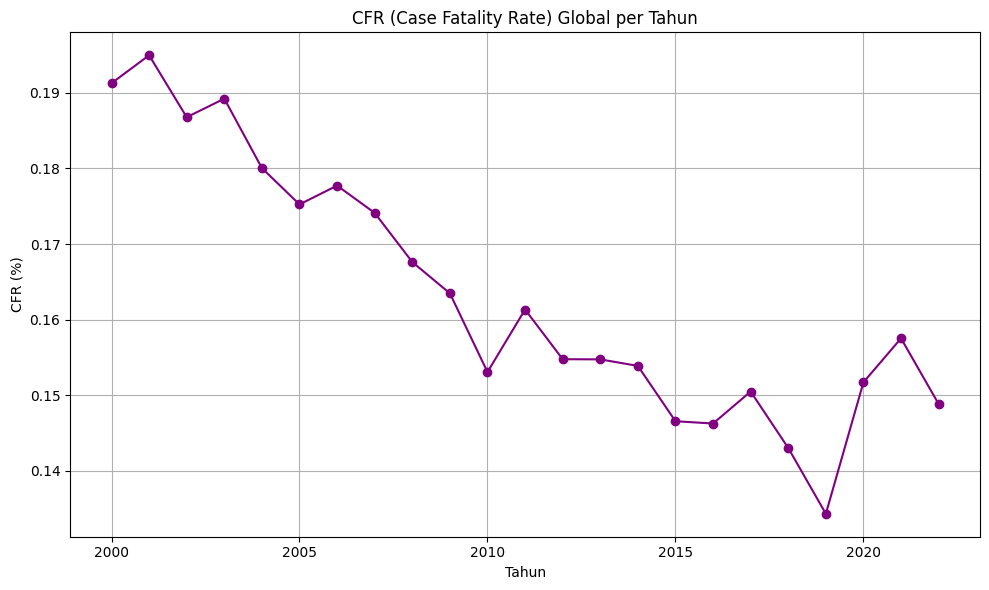

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari Excel dan bersihkan kolom
df_burden = pd.read_excel("/content/WHO TB dataset_2024-03-21.xlsx", sheet_name="TB_burden_countries_2024-03-21")
df_burden.columns = [c.strip() for c in df_burden.columns]

# Ambil data CFR global berdasarkan rata-rata seluruh negara per tahun
df_cfr = df_burden[df_burden['cfr'].notna()]
df_cfr_agg = df_cfr.groupby('year')['cfr'].mean().reset_index()

# Plot CFR per tahun
plt.figure(figsize=(10, 6))
plt.plot(df_cfr_agg['year'], df_cfr_agg['cfr'], marker='o', color='purple')
plt.title('CFR (Case Fatality Rate) Global per Tahun')
plt.xlabel('Tahun')
plt.ylabel('CFR (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

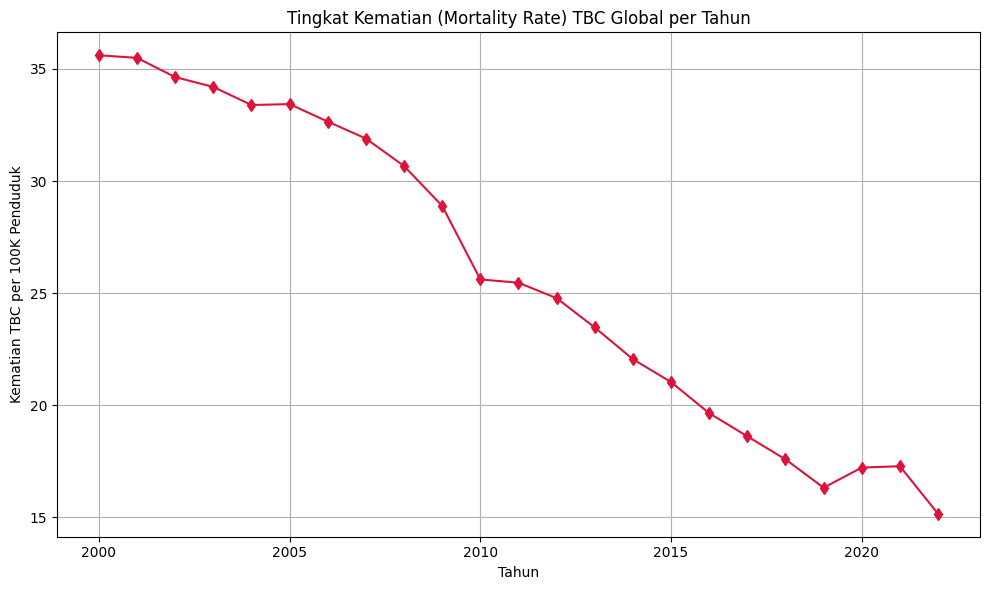

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dan bersihkan kolom
df_burden = pd.read_excel("/content/WHO TB dataset_2024-03-21.xlsx", sheet_name="TB_burden_countries_2024-03-21")
df_burden.columns = [c.strip() for c in df_burden.columns]

# Ambil data mortality rate global
df_mort = df_burden[df_burden['e_mort_100k'].notna()]
df_mort_agg = df_mort.groupby('year')['e_mort_100k'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(df_mort_agg['year'], df_mort_agg['e_mort_100k'], marker='d', color='crimson')
plt.title('Tingkat Kematian (Mortality Rate) TBC Global per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Kematian TBC per 100K Penduduk')
plt.grid(True)
plt.tight_layout()
plt.show()

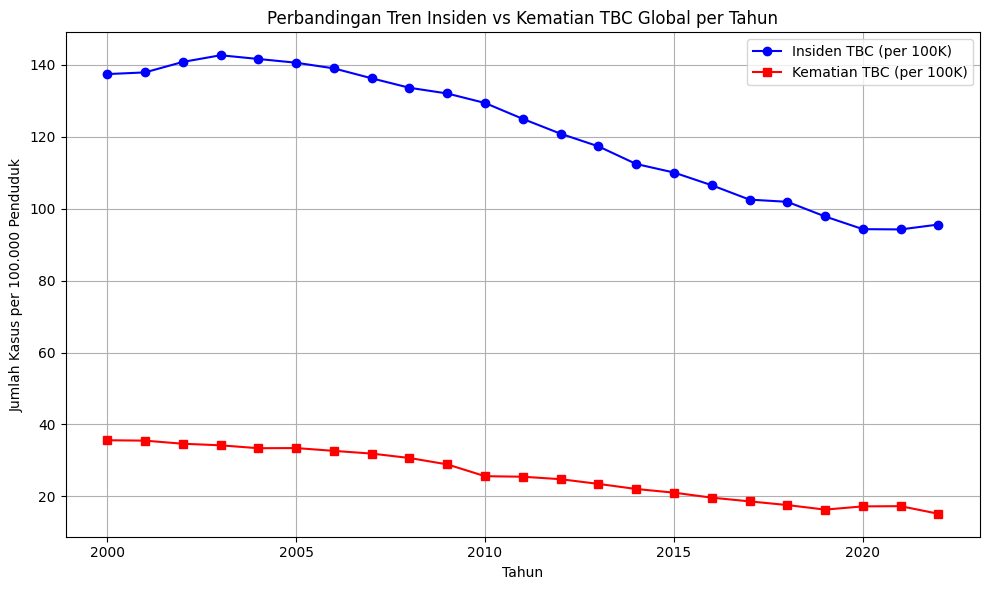

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Baca ulang data dari path yang benar
df_burden = pd.read_excel('/content/WHO TB dataset_2024-03-21.xlsx', sheet_name='TB_burden_countries_2024-03-21')
df_burden.columns = [c.strip() for c in df_burden.columns]

# ✅ Ambil data global (drop NaN dan groupby rata-rata per tahun)
df_global = df_burden[['year', 'e_mort_100k', 'e_inc_100k']].dropna()
df_global_agg = df_global.groupby('year').mean().reset_index()

# ✅ Plot garis perbandingan
plt.figure(figsize=(10, 6))
plt.plot(df_global_agg['year'], df_global_agg['e_inc_100k'], label='Insiden TBC (per 100K)', marker='o', color='blue')
plt.plot(df_global_agg['year'], df_global_agg['e_mort_100k'], label='Kematian TBC (per 100K)', marker='s', color='red')
plt.title('Perbandingan Tren Insiden vs Kematian TBC Global per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus per 100.000 Penduduk')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

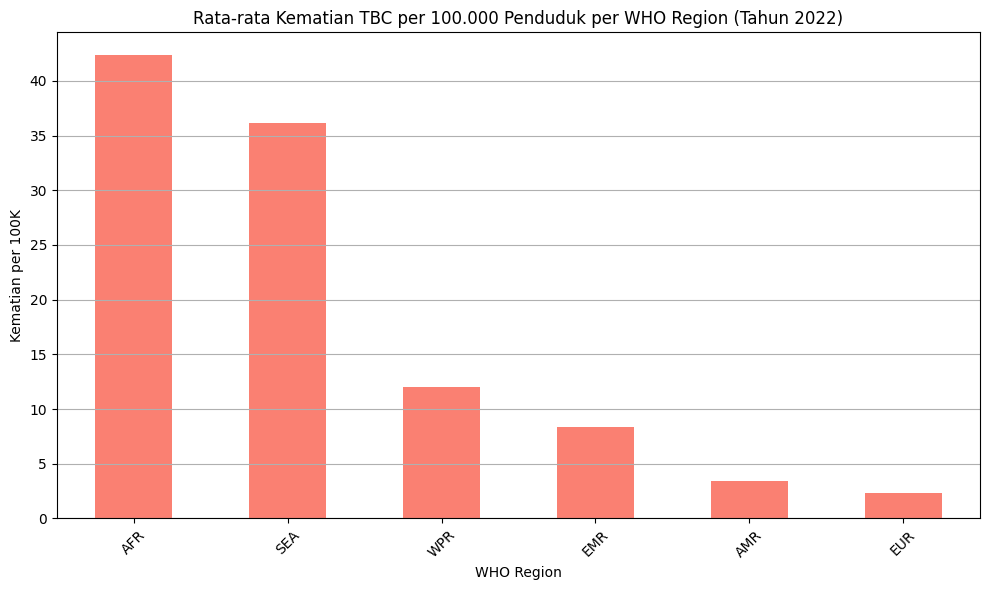

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca ulang data dan bersihkan kolom
df_burden = pd.read_excel('/content/WHO TB dataset_2024-03-21.xlsx', sheet_name='TB_burden_countries_2024-03-21')
df_burden.columns = [c.strip() for c in df_burden.columns]

# Filter tahun terbaru (misalnya 2022)
latest_year = df_burden['year'].max()
df_latest = df_burden[df_burden['year'] == latest_year]

# Kelompokkan berdasarkan WHO region dan hitung rata-rata kematian
df_death_region = df_latest.groupby('g_whoregion')['e_mort_100k'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10,6))
df_death_region.plot(kind='bar', color='salmon')
plt.title(f'Rata-rata Kematian TBC per 100.000 Penduduk per WHO Region (Tahun {latest_year})')
plt.ylabel('Kematian per 100K')
plt.xlabel('WHO Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

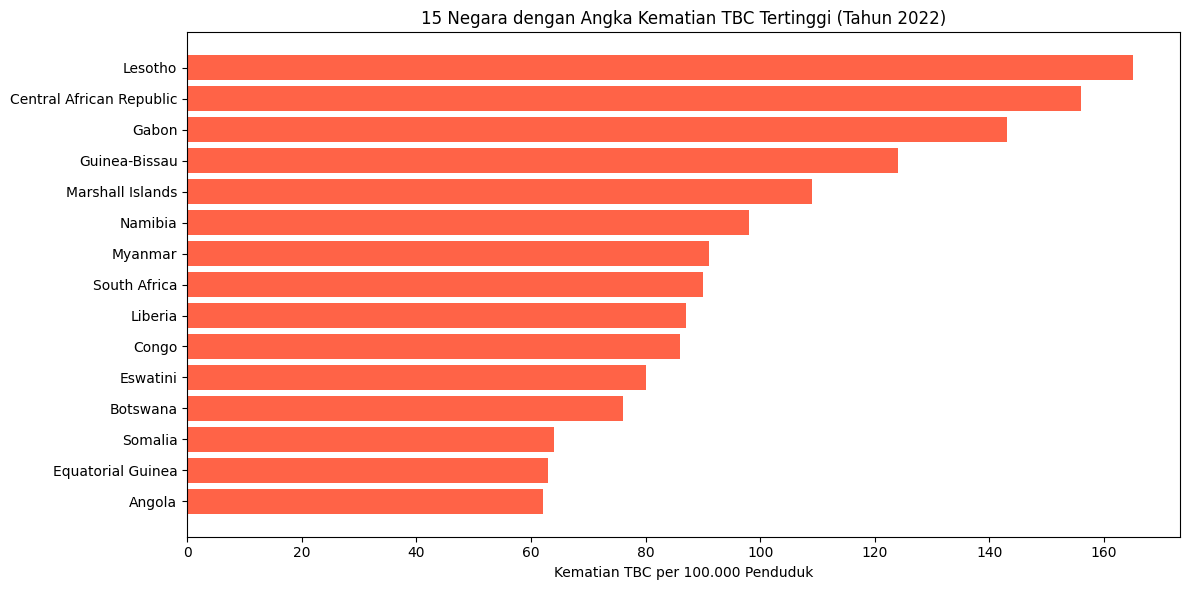

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
df_burden = pd.read_excel('/content/WHO TB dataset_2024-03-21.xlsx', sheet_name='TB_burden_countries_2024-03-21')
df_burden.columns = [c.strip() for c in df_burden.columns]

# Ambil data tahun terbaru
latest_year = df_burden['year'].max()
df_latest = df_burden[df_burden['year'] == latest_year]

# Urutkan 15 negara dengan kematian tertinggi
df_top_death = df_latest[['country', 'e_mort_100k']].dropna()
df_top_death = df_top_death.sort_values(by='e_mort_100k', ascending=False).head(15)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.barh(df_top_death['country'], df_top_death['e_mort_100k'], color='tomato')
plt.xlabel('Kematian TBC per 100.000 Penduduk')
plt.title(f'15 Negara dengan Angka Kematian TBC Tertinggi (Tahun {latest_year})')
plt.gca().invert_yaxis()  # Biar negara paling tinggi di atas
plt.tight_layout()
plt.show()

In [30]:
# Cek semua kolom yang mengandung kata 'prev' dan 'mort'
print([col for col in df_burden.columns if 'prev' in col.lower()])
print([col for col in df_burden.columns if 'mort' in col.lower()])


[]
['e_mort_exc_tbhiv_100k', 'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi', 'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo', 'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo', 'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo', 'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo', 'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi']


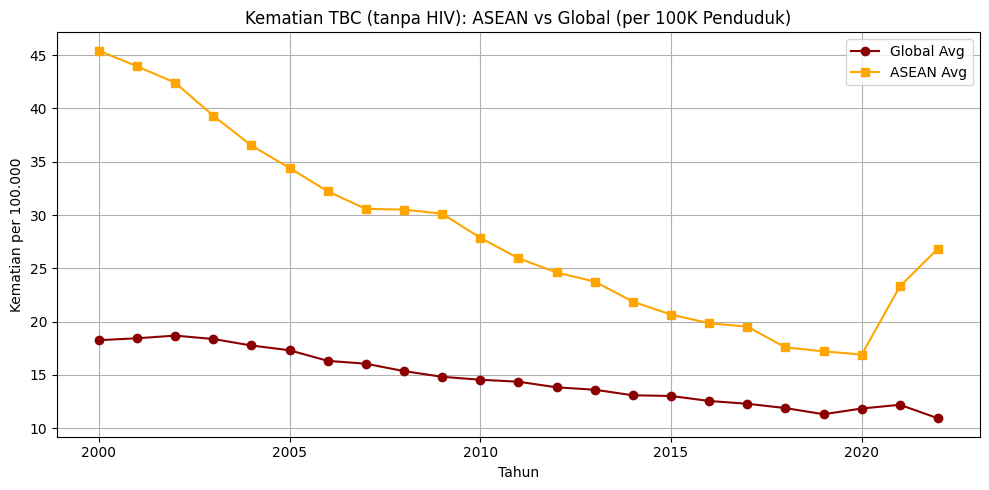

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

asean_countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines',
                   'Vietnam', 'Cambodia', 'Laos', 'Myanmar', 'Brunei Darussalam']

# Ambil kolom yang relevan dan drop NA
df_filtered = df_burden[['country', 'year', 'e_mort_exc_tbhiv_100k']].dropna()

# Global average per tahun
df_global_avg = df_filtered.groupby('year')['e_mort_exc_tbhiv_100k'].mean().reset_index()

# ASEAN average per tahun
df_asean = df_filtered[df_filtered['country'].isin(asean_countries)]
df_asean_avg = df_asean.groupby('year')['e_mort_exc_tbhiv_100k'].mean().reset_index()

# Plot perbandingan ASEAN vs Global
plt.figure(figsize=(10,5))
plt.plot(df_global_avg['year'], df_global_avg['e_mort_exc_tbhiv_100k'], label='Global Avg', marker='o', color='darkred')
plt.plot(df_asean_avg['year'], df_asean_avg['e_mort_exc_tbhiv_100k'], label='ASEAN Avg', marker='s', color='orange')

plt.title('Kematian TBC (tanpa HIV): ASEAN vs Global (per 100K Penduduk)')
plt.xlabel('Tahun')
plt.ylabel('Kematian per 100.000')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


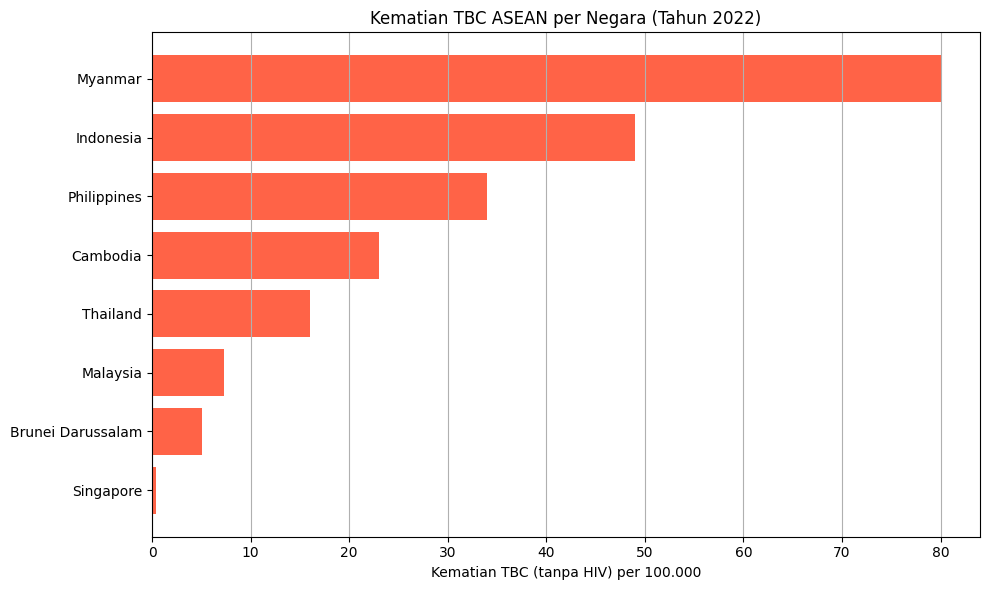

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar negara ASEAN
asean_countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines',
                   'Vietnam', 'Cambodia', 'Laos', 'Myanmar', 'Brunei Darussalam']

# Ambil data kolom yang relevan
df_asean = df_burden[df_burden['country'].isin(asean_countries)]

# Ambil tahun terakhir yang tersedia
latest_year = df_asean['year'].max()
df_latest = df_asean[df_asean['year'] == latest_year]

# Ambil kolom kematian tanpa HIV
df_plot = df_latest[['country', 'e_mort_exc_tbhiv_100k']].dropna()

# Urutkan dari yang tertinggi
df_plot = df_plot.sort_values(by='e_mort_exc_tbhiv_100k', ascending=False)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.barh(df_plot['country'], df_plot['e_mort_exc_tbhiv_100k'], color='tomato')
plt.xlabel('Kematian TBC (tanpa HIV) per 100.000')
plt.title(f'Kematian TBC ASEAN per Negara (Tahun {latest_year})')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

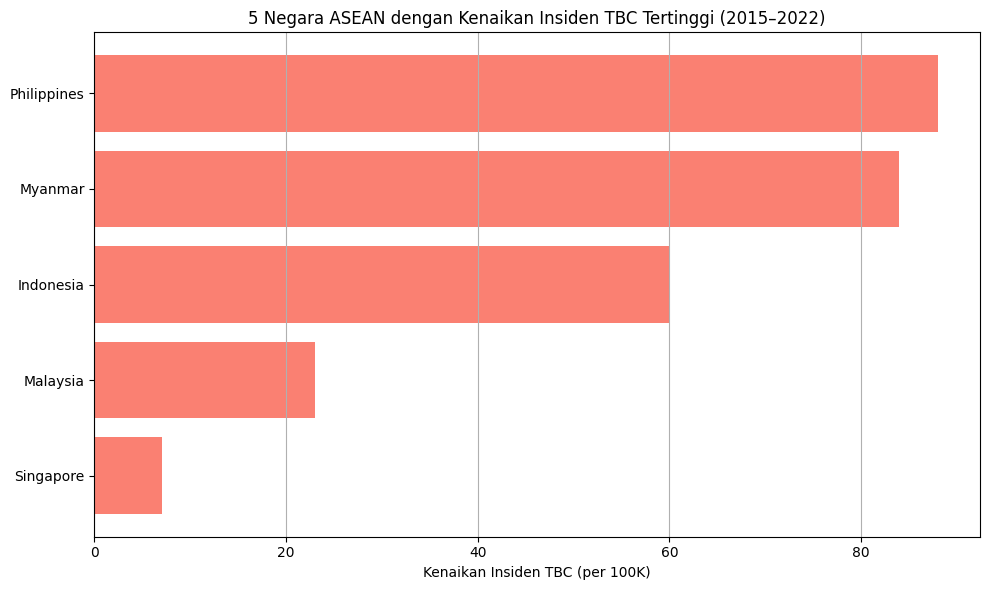

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar negara ASEAN
asean_countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines',
                   'Vietnam', 'Brunei Darussalam', 'Cambodia', 'Myanmar', 'Lao People\'s Democratic Republic']

# Ambil data dari sheet burden
df_burden = pd.read_excel('/content/WHO TB dataset_2024-03-21.xlsx',
                          sheet_name='TB_burden_countries_2024-03-21')
df_burden.columns = [c.strip() for c in df_burden.columns]

# Filter ASEAN dan kolom yang relevan
df_asean = df_burden[df_burden['country'].isin(asean_countries)]
df_inc = df_asean[['country', 'year', 'e_inc_100k']].dropna()

# Hitung selisih insiden per 100K dari 2015 ke 2022
df_years = df_inc[df_inc['year'].isin([2015, 2022])]
df_pivot = df_years.pivot(index='country', columns='year', values='e_inc_100k')
df_pivot['change'] = df_pivot[2022] - df_pivot[2015]
df_pivot = df_pivot.sort_values(by='change', ascending=False)

# Ambil 5 negara ASEAN dengan kenaikan tertinggi
top5 = df_pivot.head(5)

# Visualisasi
plt.figure(figsize=(10,6))
plt.barh(top5.index, top5['change'], color='salmon')
plt.xlabel('Kenaikan Insiden TBC (per 100K)')
plt.title('5 Negara ASEAN dengan Kenaikan Insiden TBC Tertinggi (2015–2022)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

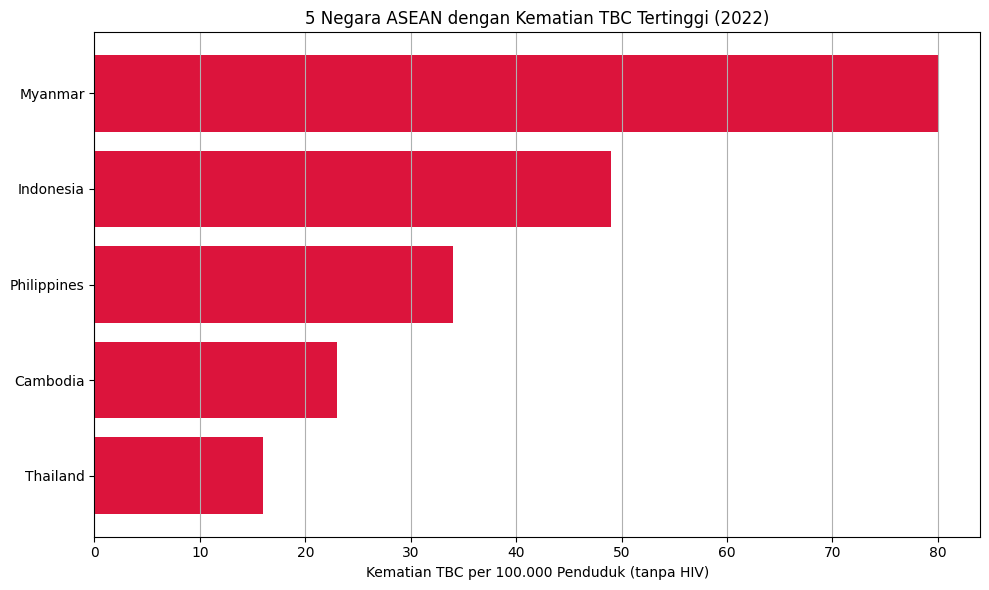

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar negara ASEAN
asean_countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines',
                   'Vietnam', 'Brunei Darussalam', 'Cambodia', 'Myanmar', "Lao People's Democratic Republic"]

# Load data
df_burden = pd.read_excel('/content/WHO TB dataset_2024-03-21.xlsx',
                          sheet_name='TB_burden_countries_2024-03-21')
df_burden.columns = [c.strip() for c in df_burden.columns]

# Cek nama kolom kematian per 100k
# print([col for col in df_burden.columns if 'mort' in col.lower()])

# Gunakan kolom 'e_mort_exc_tbhiv_100k' → estimasi kematian TBC (tanpa HIV) per 100k
df_asean = df_burden[df_burden['country'].isin(asean_countries)]
df_death = df_asean[df_asean['year'] == 2022][['country', 'e_mort_exc_tbhiv_100k']].dropna()
df_top5_death = df_death.sort_values(by='e_mort_exc_tbhiv_100k', ascending=False).head(5)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(df_top5_death['country'], df_top5_death['e_mort_exc_tbhiv_100k'], color='crimson')
plt.xlabel('Kematian TBC per 100.000 Penduduk (tanpa HIV)')
plt.title('5 Negara ASEAN dengan Kematian TBC Tertinggi (2022)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

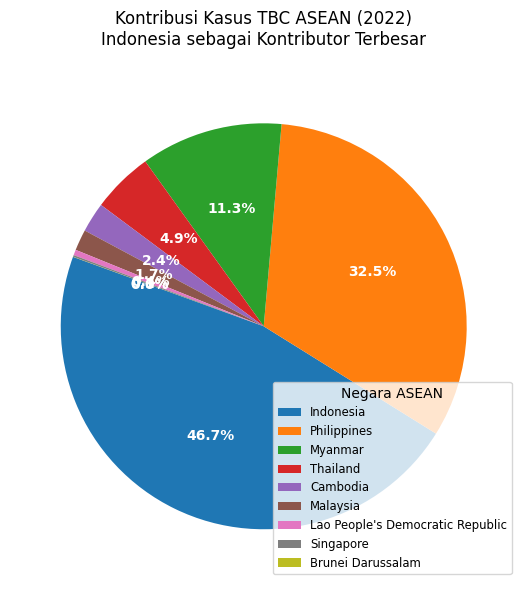

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar negara ASEAN
asean_countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines',
                   'Vietnam', 'Brunei Darussalam', 'Cambodia', 'Myanmar', "Lao People's Democratic Republic"]

# Load data
df_burden = pd.read_excel('/content/WHO TB dataset_2024-03-21.xlsx',
                          sheet_name='TB_burden_countries_2024-03-21')
df_burden.columns = [c.strip() for c in df_burden.columns]

# Ambil data ASEAN tahun 2022
df_asean_2022 = df_burden[(df_burden['country'].isin(asean_countries)) &
                          (df_burden['year'] == 2022)]

# Gunakan estimasi jumlah absolut kasus insiden (e_inc_num)
df_cases = df_asean_2022[['country', 'e_inc_num']].dropna()

# Hitung proporsi kontribusi
df_cases = df_cases.sort_values(by='e_inc_num', ascending=False)
total_cases = df_cases['e_inc_num'].sum()
df_cases['percentage'] = (df_cases['e_inc_num'] / total_cases) * 100

import matplotlib.pyplot as plt

# Pie chart dengan legend rapi
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    df_cases['e_inc_num'],
    autopct='%1.1f%%',
    startangle=160,
    textprops={'color': 'white'}
)

# Tambahkan legend di kanan bawah
plt.legend(
    wedges,
    df_cases['country'],
    title="Negara ASEAN",
    loc='lower right',
    bbox_to_anchor=(1, 0),
    fontsize='small'
)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Kontribusi Kasus TBC ASEAN (2022)\nIndonesia sebagai Kontributor Terbesar', pad=20)
plt.tight_layout()
plt.show()


In [40]:
# Cek kolom yang mengandung kata 'prev' dan 'mort'
print([col for col in df_burden.columns if 'prev' in col.lower()])
print([col for col in df_burden.columns if 'mort' in col.lower()])

[]
['e_mort_exc_tbhiv_100k', 'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi', 'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo', 'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo', 'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo', 'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo', 'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi']


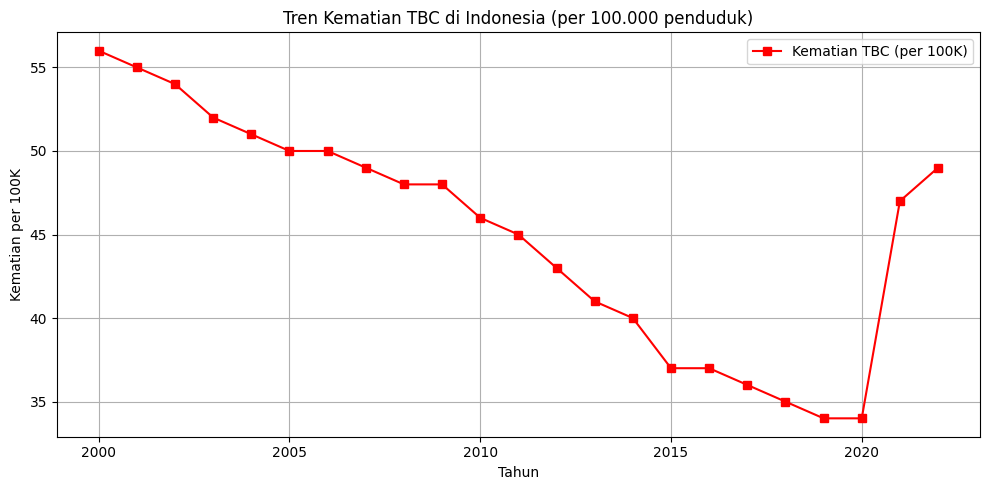

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter hanya data Indonesia
df_id = df_burden[df_burden['country'] == 'Indonesia']

# Ambil kolom tahun dan kematian
df_id = df_id[['year', 'e_mort_exc_tbhiv_100k']].dropna()

# Plot tren kematian
plt.figure(figsize=(10, 5))
plt.plot(df_id['year'], df_id['e_mort_exc_tbhiv_100k'], label='Kematian TBC (per 100K)', color='red', marker='s')

plt.title('Tren Kematian TBC di Indonesia (per 100.000 penduduk)')
plt.xlabel('Tahun')
plt.ylabel('Kematian per 100K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

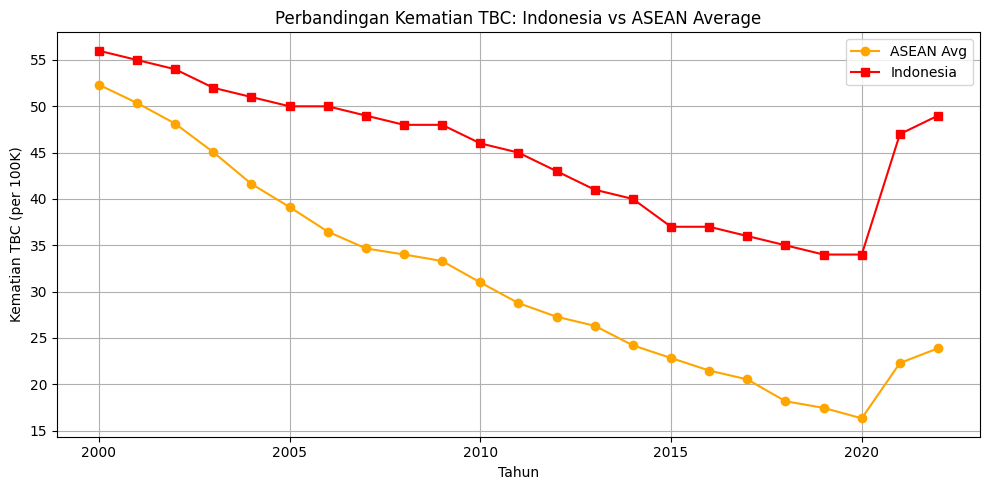

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar negara ASEAN
asean_countries = [
    'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand',
    'Brunei Darussalam', 'Viet Nam', 'Lao People\'s Democratic Republic',
    'Cambodia', 'Myanmar'
]

# Filter data ASEAN dan Indonesia
df_asean = df_burden[df_burden['country'].isin(asean_countries)]
df_indonesia = df_burden[df_burden['country'] == 'Indonesia']

# Kolom kematian TBC (tanpa HIV), gunakan kolom yang tersedia
mort_col = 'e_mort_exc_tbhiv_100k'

# Hitung rata-rata ASEAN per tahun
df_asean_avg = df_asean.groupby('year')[mort_col].mean().reset_index()

# Ambil data Indonesia per tahun
df_id = df_indonesia[['year', mort_col]].dropna()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_asean_avg['year'], df_asean_avg[mort_col], label='ASEAN Avg', color='orange', marker='o')
plt.plot(df_id['year'], df_id[mort_col], label='Indonesia', color='red', marker='s')
plt.title('Perbandingan Kematian TBC: Indonesia vs ASEAN Average')
plt.xlabel('Tahun')
plt.ylabel('Kematian TBC (per 100K)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


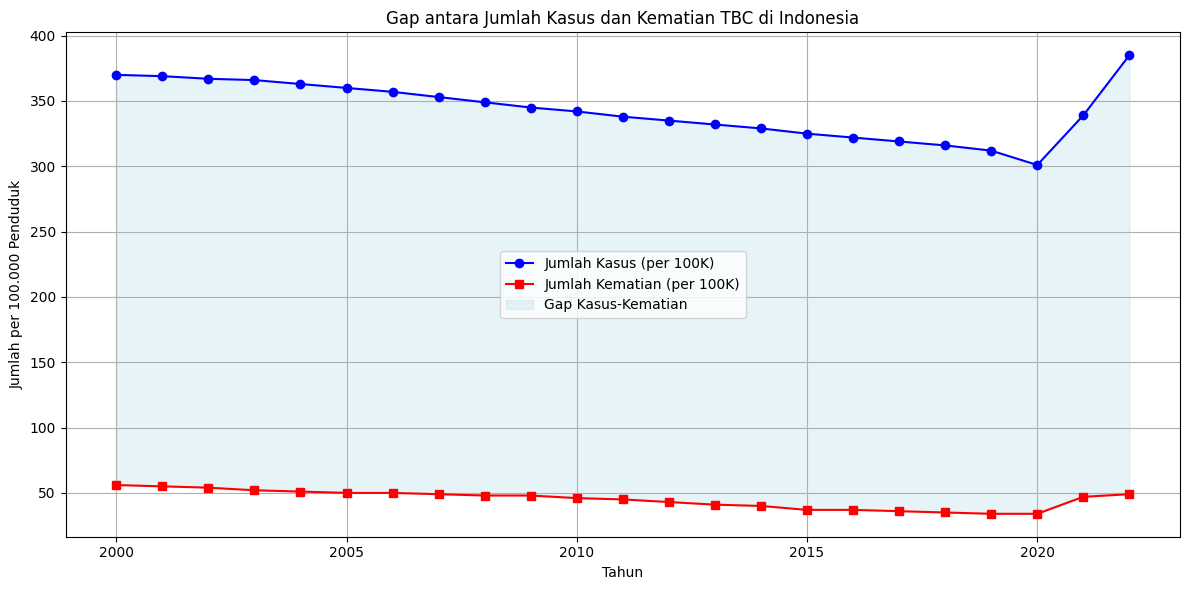

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data Indonesia
df_id = df_burden[df_burden['country'] == 'Indonesia']

# Ambil kolom tahun, insiden (jumlah kasus), dan kematian
df_gap = df_id[['year', 'e_inc_100k', 'e_mort_exc_tbhiv_100k']].dropna()
df_gap = df_gap.rename(columns={
    'e_inc_100k': 'Kasus per 100K',
    'e_mort_exc_tbhiv_100k': 'Kematian per 100K'
})

# Hitung selisih (gap)
df_gap['Gap Kasus-Kematian'] = df_gap['Kasus per 100K'] - df_gap['Kematian per 100K']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_gap['year'], df_gap['Kasus per 100K'], label='Jumlah Kasus (per 100K)', marker='o', color='blue')
plt.plot(df_gap['year'], df_gap['Kematian per 100K'], label='Jumlah Kematian (per 100K)', marker='s', color='red')
plt.fill_between(df_gap['year'], df_gap['Kasus per 100K'], df_gap['Kematian per 100K'],
                 color='lightblue', alpha=0.3, label='Gap Kasus-Kematian')
plt.title('Gap antara Jumlah Kasus dan Kematian TBC di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Jumlah per 100.000 Penduduk')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


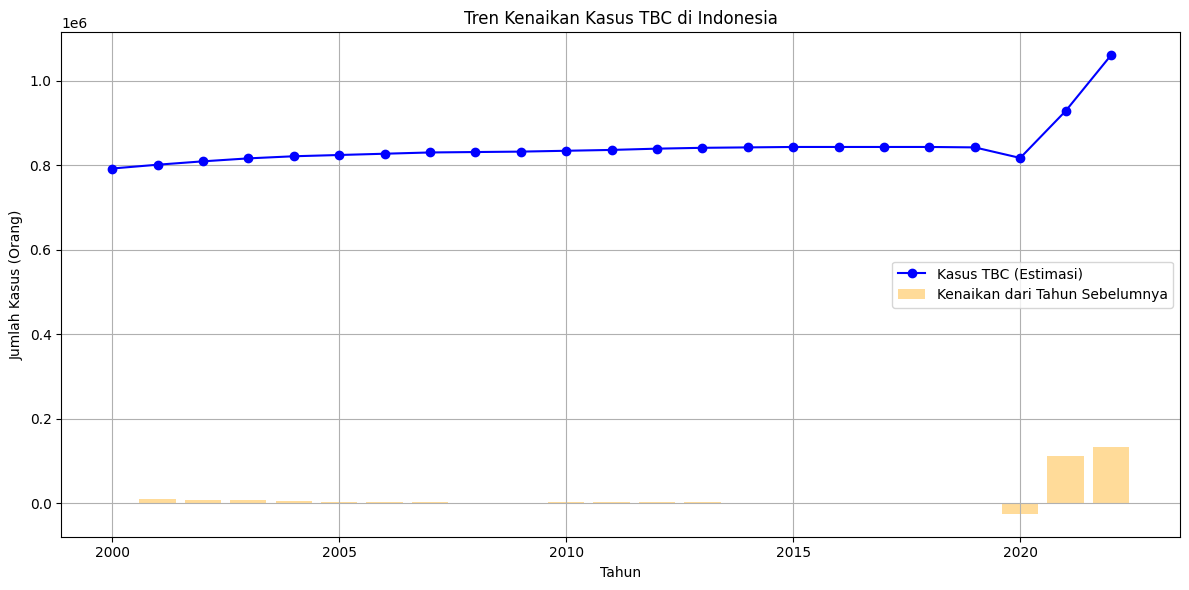

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil data Indonesia saja
df_id = df_burden[df_burden['country'] == 'Indonesia']
df_trend = df_id[['year', 'e_inc_num']].dropna()

# Hitung selisih pertumbuhan dari tahun ke tahun
df_trend['kenaikan'] = df_trend['e_inc_num'].diff()

# Plot line chart + bar kenaikan
plt.figure(figsize=(12, 6))
plt.plot(df_trend['year'], df_trend['e_inc_num'], marker='o', label='Kasus TBC (Estimasi)', color='blue')
plt.bar(df_trend['year'], df_trend['kenaikan'], color='orange', alpha=0.4, label='Kenaikan dari Tahun Sebelumnya')
plt.title('Tren Kenaikan Kasus TBC di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus (Orang)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show(